In [1]:
import torch
import torch.nn.functional as F

In [2]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

D:\language\Python\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [3]:
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 2.3076648712158203
1 2.3022501468658447
2 2.297078847885132
3 2.2921323776245117
4 2.28739333152771
5 2.2828450202941895
6 2.278472423553467
7 2.2742621898651123
8 2.2702009677886963
9 2.266277551651001
10 2.262481212615967
11 2.2588019371032715
12 2.255230188369751
13 2.251758337020874
14 2.248378038406372
15 2.245082139968872
16 2.2418649196624756
17 2.2387194633483887
18 2.2356410026550293
19 2.232623815536499
20 2.229663610458374
21 2.2267558574676514
22 2.2238969802856445
23 2.221082925796509
24 2.218311071395874
25 2.2155773639678955
26 2.2128801345825195
27 2.2102158069610596
28 2.207582473754883
29 2.2049779891967773
30 2.202399969100952
31 2.1998472213745117
32 2.197317361831665
33 2.1948094367980957
34 2.192321538925171
35 2.189852714538574
36 2.187401294708252
37 2.184966564178467
38 2.1825475692749023
39 2.180143117904663
40 2.177752733230591
41 2.17537522315979
42 2.1730098724365234
43 2.1706559658050537
44 2.1683132648468018
45 2.165980815887451
46 2.163658618927002
47 

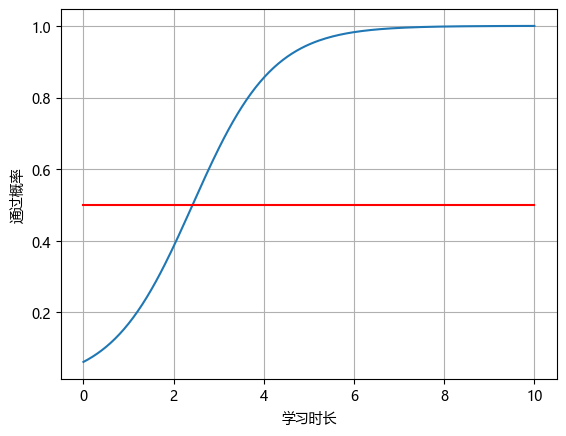

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)
y = y_t.data.numpy()

plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('学习时长')
plt.ylabel('通过概率')
plt.grid()
plt.show()